# Import the related library

In [2]:
library(ggplot2) 
library(corrplot) 
library(ggrepel) 
library(randomForest) 
library(psych) 
library(xgboost)
library(knitr) 
library(Rmisc) 
library(caret) 
library(gridExtra)
library(scales) 
library(lattice) 
library(plyr)
library (dplyr)
library(e1071)
library(glmnet)
library(randomForest)
library(ranger)
library(Metrics)
library(kernlab)
library(nnet)
if (!require("pacman")) install.packages("pacman")
pacman::p_load(tidyverse, skimr, data.table, lightgbm, DescTools)

In [3]:
data <- read.csv("./data/train.csv")
View(data)

ID,target,X48df886f9,X0deb4b6a8,X34b15f335,a8cb14b00,X2f0771a37,X30347e683,d08d1fbe3,X6ee66e115,⋯,X3ecc09859,X9281abeea,X8675bec0b,X3a13ed79a,f677d4d13,X71b203550,X137efaa80,fb36b89d9,X7e293fbaf,X9fc776466
<chr>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
000d6aaf2,38000000.0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
000fbd867,600000.0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0027d6b71,10000000.0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0028cbf45,2000000.0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
002a68644,14400000.0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
002dbeb22,2800000.0,0,0,0,0,0,0,0,0,⋯,12000,5600000,20000000,0,0,0,0,0,0,11000
003925ac6,164000.0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,40000,0,0,0
003eb0261,600000.0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
004b92275,979000.0,0,0,0,0,0,0,0,0,⋯,0,0,4000000,0,0,0,0,0,0,0


In [3]:
dim(data)

[1] 4459 4993

In [4]:
missing_values <- colSums(is.na(data))
cols_with_missing_values <- names(missing_values[missing_values > 0])
print(cols_with_missing_values)

character(0)


In [5]:
numericVars <- which(sapply(data, is.numeric)) # index vector numeric variables
numericVarNames <- names(numericVars)
cat('There are', length(numericVars), 'numeric variables')

There are 4992 numeric variables

In [4]:
summary(data$target)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   30000   600000  2260000  5944923  8000000 40000000 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


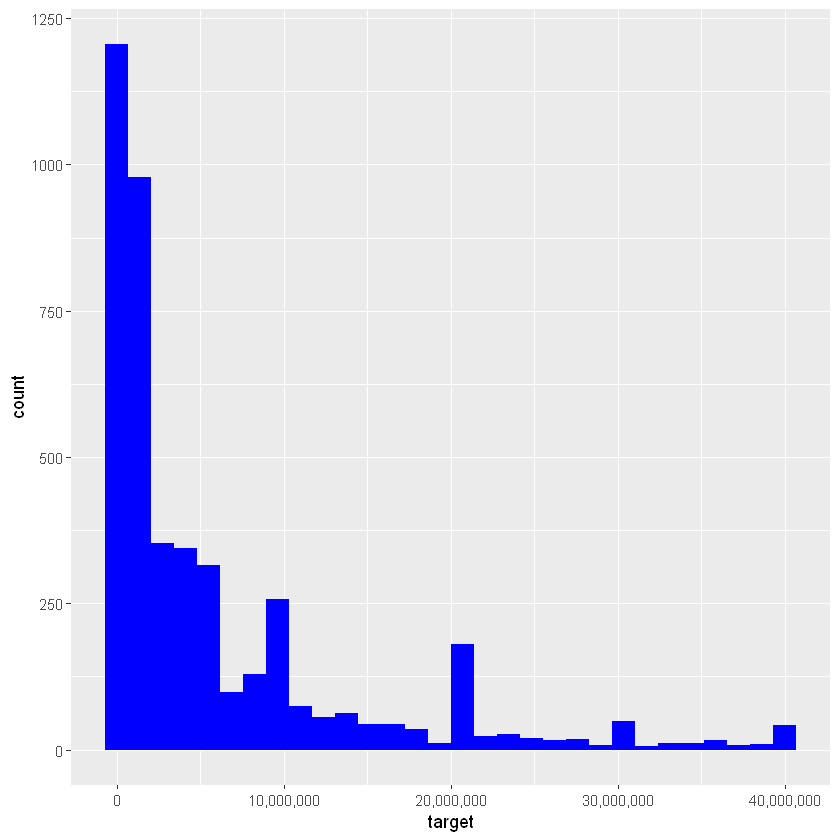

In [6]:
ggplot(data = data[!is.na(data$target),], aes(x=target)) + geom_histogram(fill='blue') + scale_x_continuous(labels = comma)

In [5]:
Target <- data$target %>% as.numeric() %>% log1p()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


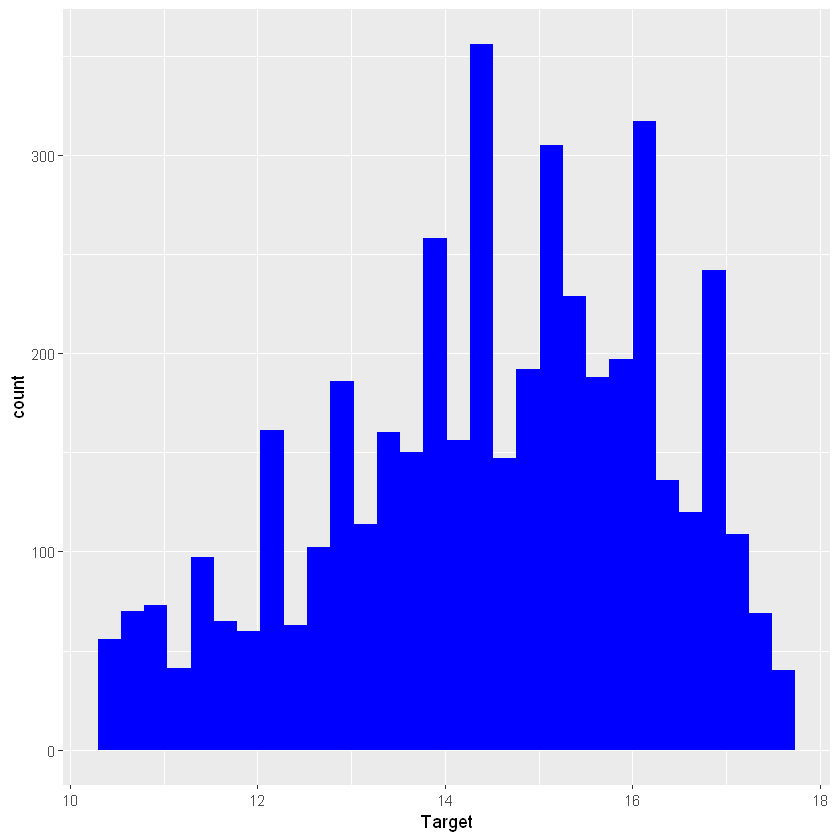

In [8]:
ggplot(data.frame(Target), aes(x=Target)) + geom_histogram(fill='blue') + scale_x_continuous(labels = comma)

In [6]:
summary(Target)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.31   13.30   14.63   14.49   15.89   17.50 

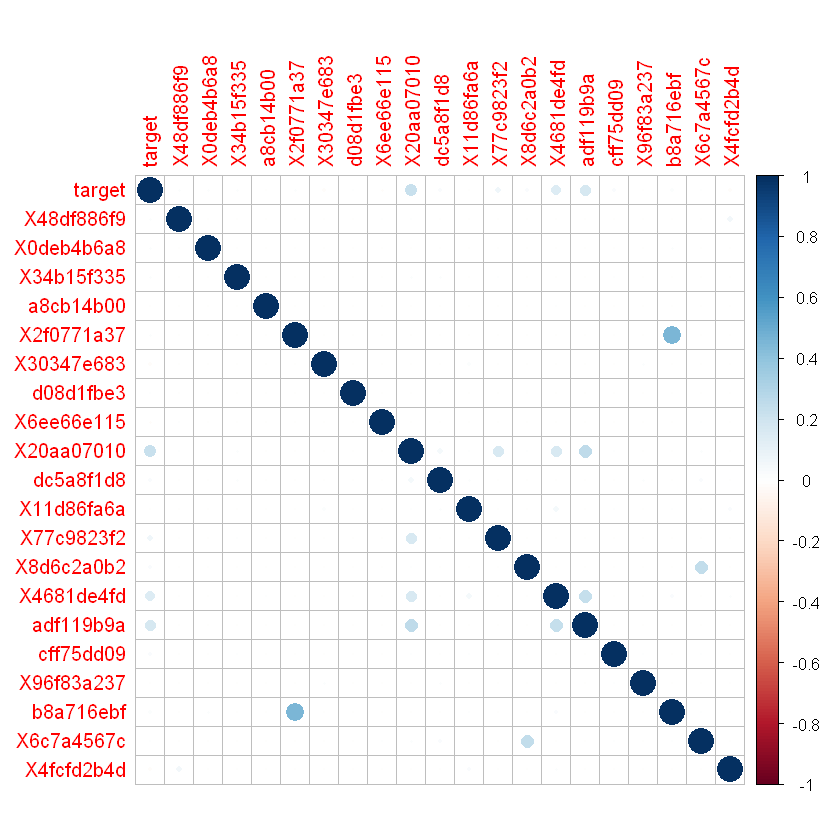

In [45]:
cor_matrix <- cor(data[,2:22])
corrplot(cor_matrix, method = "circle")

In [7]:
train <- data[,-(1:2)]
train

X48df886f9,X0deb4b6a8,X34b15f335,a8cb14b00,X2f0771a37,X30347e683,d08d1fbe3,X6ee66e115,X20aa07010,dc5a8f1d8,⋯,X3ecc09859,X9281abeea,X8675bec0b,X3a13ed79a,f677d4d13,X71b203550,X137efaa80,fb36b89d9,X7e293fbaf,X9fc776466
<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,2200000,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,2000000,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,17020000,0,⋯,12000,5600000,20000000,0,0,0,0,0,0,11000
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,40000,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,58000,0,⋯,0,0,4000000,0,0,0,0,0,0,0


In [8]:
variances <- apply(train, 2, var)
zero_var_cols <- which(variances == 0)
train <- train[, -zero_var_cols]
train

X48df886f9,X0deb4b6a8,X34b15f335,a8cb14b00,X2f0771a37,X30347e683,d08d1fbe3,X6ee66e115,X20aa07010,dc5a8f1d8,⋯,X3ecc09859,X9281abeea,X8675bec0b,X3a13ed79a,f677d4d13,X71b203550,X137efaa80,fb36b89d9,X7e293fbaf,X9fc776466
<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,2200000,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,2000000,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,17020000,0,⋯,12000,5600000,20000000,0,0,0,0,0,0,11000
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,40000,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,58000,0,⋯,0,0,4000000,0,0,0,0,0,0,0


Importance of components:
                            PC1     PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     10.64292 9.93922 8.57195 7.4751 6.12388 5.92454 5.61172
Proportion of Variance  0.02392 0.02086 0.01552 0.0118 0.00792 0.00741 0.00665
Cumulative Proportion   0.02392 0.04479 0.06030 0.0721 0.08002 0.08744 0.09409
                           PC8     PC9    PC10    PC11   PC12    PC13    PC14
Standard deviation     5.50122 5.06250 4.63723 4.53543 4.1867 4.09662 3.94477
Proportion of Variance 0.00639 0.00541 0.00454 0.00434 0.0037 0.00354 0.00329
Cumulative Proportion  0.10048 0.10589 0.11043 0.11478 0.1185 0.12202 0.12531
                          PC15    PC16    PC17    PC18    PC19   PC20    PC21
Standard deviation     3.87085 3.84363 3.74068 3.71500 3.69599 3.6419 3.62731
Proportion of Variance 0.00316 0.00312 0.00296 0.00291 0.00288 0.0028 0.00278
Cumulative Proportion  0.12848 0.13160 0.13455 0.13747 0.14035 0.1431 0.14593
                          PC22   P

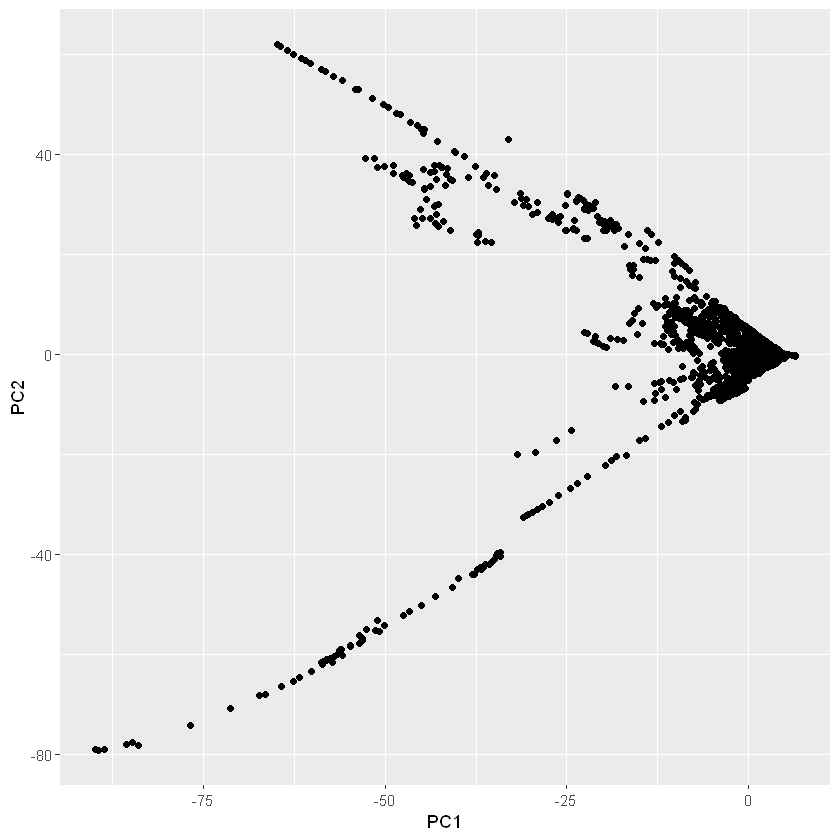

In [9]:
pca_result <- prcomp(train, center = TRUE, scale. = TRUE, rank. = min(nrow(train), ncol(train)))

summary(pca_result)


ggplot(data.frame(pca_result$x), aes(x = PC1, y = PC2)) + 
  geom_point()

In [10]:
pca_data <- as.data.frame(pca_result$x[, 1:589])
pca_data

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC580,PC581,PC582,PC583,PC584,PC585,PC586,PC587,PC588,PC589
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.3438826,-1.33558286,0.3687041,-0.45919494,0.06148128,0.43322672,-0.5336273,0.568342541,-0.003999937,0.401305480,⋯,-0.28137242,0.59395071,-0.83186525,-0.194942343,0.60832468,-0.583500990,-0.163176508,0.504502879,0.4265820465,-0.51737622
3.5139111,-0.55846197,0.5863799,1.49348974,0.65328920,0.51227781,-0.8316693,-0.508007304,-0.389001575,-0.543492166,⋯,-0.12619713,-2.24875762,1.11624413,-0.363883493,-0.47453643,-0.408725681,-1.259724004,-0.704208365,-1.3688140638,-0.24538663
4.7737259,-0.50270595,0.9395600,1.10881084,0.60229522,0.83999900,-0.7764757,0.087347162,0.352870985,-0.589006294,⋯,-0.03232804,0.04445330,-0.07629460,0.001860762,0.09012681,0.053602872,0.054511963,-0.154656635,-0.0036116608,0.12192665
4.9922123,-0.33508409,0.8629256,1.16727418,0.61972773,0.85895125,-0.7854438,-0.005462154,0.356907446,-0.613645911,⋯,0.07945195,-0.08840268,-0.10860127,-0.130915012,0.27939375,0.161796076,0.046680866,-0.258186463,-0.1158580359,0.03656531
4.3680552,-0.87293208,0.9606449,1.06671434,0.45918123,0.75573967,-0.7583664,0.033622603,0.326755825,-0.510585930,⋯,-0.38094745,0.16264349,0.04509288,-0.013513663,0.09630232,0.050957214,0.022322967,0.158543819,-0.0236770966,-0.16454663
-10.7948380,-5.31768434,-3.5717762,-21.42720580,-10.52579768,-6.23127422,-1.2434492,-0.458005157,-0.362632497,-2.203407803,⋯,-0.83923031,0.44496145,-0.41578437,-0.997759596,-0.22946298,-2.087555313,0.791188385,0.520172805,-1.9353859836,-0.28654365
4.9724152,-0.06073650,0.4787655,-0.34164370,-0.23871094,1.87726597,5.9611978,-1.316035019,0.634571044,-0.009563295,⋯,0.15072862,2.93505369,2.17549499,0.013244890,-0.09397538,-4.148001569,-0.089448660,0.129956430,-0.7163797495,3.58481309
3.7998836,-0.56760739,-0.3584536,1.42610946,0.26926118,1.83402090,1.4396980,-0.314583814,0.791549333,-0.929559982,⋯,1.26231020,-1.29741066,-0.35040891,0.743916367,-1.28296311,-1.309164979,0.563570752,0.011156681,-0.8613765870,-0.22952108
4.4825660,-0.27122239,0.9225202,1.02232486,-1.93308190,0.04739679,-0.7285281,0.185362586,0.321456473,-0.439618558,⋯,0.04352648,-0.14699243,-0.12919072,-0.111865205,-0.15936644,0.214179689,-0.044687108,0.100721505,0.0650549533,0.01350007


In [11]:
set.seed(42)

index <-  sort(sample(nrow(pca_data), nrow(pca_data)*.8))
x_train <- pca_data[index,]
x_test <- pca_data[-index,]
y_train <- data.frame(Target)[index,]
y_test <- data.frame(Target)[-index,]

In [48]:
ctrl <- trainControl(method = "cv", number = 5)  # 5 fold

In [15]:
print(dim(x_train))
print(dim(x_test))

[1] 3567  589
[1] 892 589


In [12]:
model_lib <- function(model,x_train,x_test,y_train,y_test) {
    if (model=="lm") {
      model <- train(x_train, y_train, method = "lm")
  } else if (model=="ridge") {
    model <- train(x_train, y_train, method = "ridge")
  } else if(model=="lasso") {
      # Lasso回归
    model <- train(x_train, y_train, method = "lasso")
  } else if(model == "elastic"){
      # Elastic Net回归
    model <- train(x_train, y_train, method = "enet")
  } else if(model == "svr"){
      # 支持向量机回归
    model <- train(x_train, y_train, method = "svmRadial")
  } else if(model=="rf"){
      # 决策树回归
    model <- train(x_train, y_train, method = "rf")
  }
    else {
      stop("model not in library!")
  }
    pred <- predict(model, x_test)
    rmse <- rmse(y_test, pred)
    mae <- mae(y_test, pred)
    return(list(model= model, rmse=rmse,mae=mae))
}

In [17]:
lm_result <- model_lib("lm",x_train,x_test,y_train,y_test)
print(lm_result)
ridge_result <- model_lib("ridge",x_train,x_test,y_train,y_test)
print(ridge_result)
lasso_result <- model_lib("lasso",x_train,x_test,y_train,y_test)
print(lasso_result)
elastic_result <- model_lib("elastic",x_train,x_test,y_train,y_test)
print(elastic_result)

$model
Linear Regression 

3567 samples
 589 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3567, 3567, 3567, 3567, 3567, 3567, ... 
Resampling results:

  RMSE      Rsquared    MAE     
  4.033541  0.01442729  2.273099

Tuning parameter 'intercept' was held constant at a value of TRUE

$rmse
[1] 2.928906

$mae
[1] 1.824384

$model
Ridge Regression 

3567 samples
 589 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3567, 3567, 3567, 3567, 3567, 3567, ... 
Resampling results across tuning parameters:

  lambda  RMSE      Rsquared    MAE     
  0e+00   4.059253  0.01365821  2.290277
  1e-04   4.039253  0.01375660  2.284959
  1e-01   2.023569  0.03990261  1.557762

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was lambda = 0.1.

$rmse
[1] 1.926282

$mae
[1] 1.501868

$model
The lasso 

3567 samples
 589 predictor

No pre-processing
Resampling: Boots

ERROR: Error: Required packages are missing: kernlab


In [20]:
svr_result <- model_lib("svr",x_train,x_test,y_train,y_test)
print(svr_result)

$model
Support Vector Machines with Radial Basis Function Kernel 

3567 samples
 589 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3567, 3567, 3567, 3567, 3567, 3567, ... 
Resampling results across tuning parameters:

  C     RMSE      Rsquared    MAE     
  0.25  1.670801  0.09619309  1.344802
  0.50  1.664126  0.10008210  1.340704
  1.00  1.666738  0.09596076  1.347597

Tuning parameter 'sigma' was held constant at a value of 0.0553166
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were sigma = 0.0553166 and C = 0.5.

$rmse
[1] 1.697674

$mae
[1] 1.380873



In [39]:
rf_result <- model_lib("rf",x_train,x_test,y_train,y_test)
print(rf_result)

$rmse [1] 1.514563 
$mae [1] 1.357896

In [21]:
nn_model <- nnet::nnet(x_train, y_train, size = 10, linout = TRUE, maxit=1000, MaxNWts=84581)
nn_test_pred <- predict(nn_model, x_test)
nn_rmse <- rmse(y_test, nn_test_pred)
nn_mae <- mae(y_test, nn_test_pred)
# 输出神经网络模型的性能指标
cat("Neural Network Model Performance:\n")
cat("RMSE:", nn_rmse, "\n")
cat("MAE:", nn_mae, "\n")

# weights:  5911
initial  value 741727.533906 
iter  10 value 83750.283799
iter  20 value 10015.298071
iter  30 value 9405.750053
iter  40 value 8622.834909
iter  50 value 7849.064544
iter  60 value 7218.953898
iter  70 value 6861.793254
iter  80 value 6668.926679
iter  90 value 6551.629806
iter 100 value 6374.831626
iter 110 value 6257.423174
iter 120 value 6206.263781
iter 130 value 6144.920370
iter 140 value 6099.830452
iter 150 value 6031.738707
iter 160 value 5955.828459
iter 170 value 5888.150675
iter 180 value 5839.212248
iter 190 value 5796.315835
iter 200 value 5756.655402
iter 210 value 5735.161113
iter 220 value 5702.093207
iter 230 value 5666.968588
iter 240 value 5628.285703
iter 250 value 5596.447908
iter 260 value 5565.368973
iter 270 value 5545.553619
iter 280 value 5528.435372
iter 290 value 5515.040519
iter 300 value 5508.671212
iter 310 value 5498.346743
iter 320 value 5493.699990
iter 330 value 5491.379262
iter 340 value 5482.841584
iter 350 value 5475.609589
iter 3

In [29]:
xgb_x_train <- as.matrix(x_train)

xgb_x_test <- as.matrix(x_test)

xgb_model <- xgboost::xgboost(data = xgb_x_train, label = y_train, nthread = 4, nrounds = 200)

xgb_test_pred <- predict(xgb_model, xgb_x_test)

xgb_rmse <- rmse(y_test, xgb_test_pred)
xgb_mae <- mae(y_test, xgb_test_pred)

cat("XGBoost Model Performance:\n")
cat("RMSE:", xgb_rmse, "\n")
cat("MAE:", xgb_mae, "\n")

[1]	train-rmse:9.954024 
[2]	train-rmse:7.062370 
[3]	train-rmse:5.064679 
[4]	train-rmse:3.695567 
[5]	train-rmse:2.763516 
[6]	train-rmse:2.143919 
[7]	train-rmse:1.728780 
[8]	train-rmse:1.463772 
[9]	train-rmse:1.294763 
[10]	train-rmse:1.177113 
[11]	train-rmse:1.096992 
[12]	train-rmse:1.034495 
[13]	train-rmse:0.985345 
[14]	train-rmse:0.931604 
[15]	train-rmse:0.885300 
[16]	train-rmse:0.848397 
[17]	train-rmse:0.802117 
[18]	train-rmse:0.756792 
[19]	train-rmse:0.730013 
[20]	train-rmse:0.693307 
[21]	train-rmse:0.654901 
[22]	train-rmse:0.630920 
[23]	train-rmse:0.611231 
[24]	train-rmse:0.588430 
[25]	train-rmse:0.566649 
[26]	train-rmse:0.543816 
[27]	train-rmse:0.517653 
[28]	train-rmse:0.495479 
[29]	train-rmse:0.473186 
[30]	train-rmse:0.450593 
[31]	train-rmse:0.429398 
[32]	train-rmse:0.407829 
[33]	train-rmse:0.385571 
[34]	train-rmse:0.368157 
[35]	train-rmse:0.347701 
[36]	train-rmse:0.328967 
[37]	train-rmse:0.315025 
[38]	train-rmse:0.301005 
[39]	train-rmse:0.287

In [33]:
set.seed(42)
inTrain <- createDataPartition(Target, p=.8, list = F)
# print(inTrain)
tr <- pca_data[inTrain,]
va <- pca_data[-inTrain,]

tr_ta <- Target[inTrain]
va_ta <- Target[-inTrain]

lgb.train = lgb.Dataset(data.matrix(tr), label = tr_ta)
lgb.valid = lgb.Dataset(data.matrix(va), label = va_ta)

In [34]:
params.lgb = list(
  objective = "regression"
  , metric = "rmse"
  , min_data_in_leaf = 1
  , min_sum_hessian_in_leaf = 100
  , feature_fraction = .5
  , bagging_fraction = .5
  , bagging_freq = 4
)


lgb.model <- lgb.train(
  params = params.lgb
  , data = lgb.train
  , valids = list(val = lgb.valid)
  , learning_rate = 0.0075
  , num_leaves = 180
  , num_threads = 2
  , max_depth = 24
  , reg_alpha = .3
  , reg_lambda = .1
  , min_child_weight = 33
  , zero_as_missing = T
  , nrounds = 5000
  , early_stopping_rounds = 600
  , eval_freq = 50
)

Warning message in lgb.train(params = params.lgb, data = lgb.train, valids = list(val = lgb.valid), :
"lgb.train: Found the following passed through '...': learning_rate, num_leaves, num_threads, max_depth, reg_alpha, reg_lambda, min_child_weight, zero_as_missing. These will be used, but in future releases of lightgbm, this warning will become an error. Add these to 'params' instead. See ?lgb.train for documentation on how to call this function."


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=33 will be ignored. Current value: min_sum_hessian_in_leaf=100
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=33 will be ignored. Current value: min_sum_hessian_in_leaf=100
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=33 will be ignored. Current value: min_sum_hessian_in_leaf=100
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=33 will be ignored. Current value: min_sum_hessian_in_leaf=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 150195
[LightGBM] [Info] Number of data points in the train set: 3569, number of used features: 589
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=33 will be ignored. Current value: min_sum_hessian_in_leaf=100
[LightGBM] [Info] Sta

In [35]:
lgb_x_test <- as.matrix(x_test)
lgb_pred <- predict(lgb.model, lgb_x_test)
lgb_rmse <- rmse(y_test, lgb_pred)
lgb_mae <- mae(y_test, lgb_pred)

cat("LightGBM Model Performance:\n")
cat("RMSE:", lgb_rmse, "\n")
cat("MAE:", lgb_mae, "\n")

LightGBM Model Performance:
RMSE: 1.170869 
MAE: 0.9386955 


In [15]:
lgb.importance(lgb.model, percentage = TRUE) %>% head(20) %>% kable()



|Feature    |      Gain|     Cover| Frequency|
|:----------|---------:|---------:|---------:|
|f190486d6  | 0.0872341| 0.0401349| 0.0452790|
|X58e2e02e6 | 0.0539747| 0.0376341| 0.0462651|
|X15ace8c9f | 0.0485470| 0.0265294| 0.0285151|
|eeb9cd3aa  | 0.0454244| 0.0273243| 0.0308982|
|c47340d97  | 0.0307098| 0.0136948| 0.0142165|
|X66ace2992 | 0.0304603| 0.0137805| 0.0155313|
|X58e056e12 | 0.0236260| 0.0160365| 0.0181609|
|X9fd594eec | 0.0231555| 0.0208673| 0.0269537|
|X024c577b9 | 0.0176272| 0.0128582| 0.0142165|
|X6eef030c1 | 0.0170724| 0.0167005| 0.0196401|
|b43a7cfd5  | 0.0170229| 0.0170695| 0.0195579|
|X58232a6fb | 0.0163948| 0.0135400| 0.0154491|
|c5a231d81  | 0.0162625| 0.0131654| 0.0154491|
|X20aa07010 | 0.0160891| 0.0149230| 0.0187361|
|X1702b5bf0 | 0.0132401| 0.0121130| 0.0150382|
|fb0f5dbfe  | 0.0115051| 0.0148115| 0.0201331|
|X62e59a501 | 0.0099873| 0.0103612| 0.0129838|
|X241f0f867 | 0.0099315| 0.0049112| 0.0051771|
|X324921c7b | 0.0097472| 0.0098824| 0.0124086|
|X342e7eb03

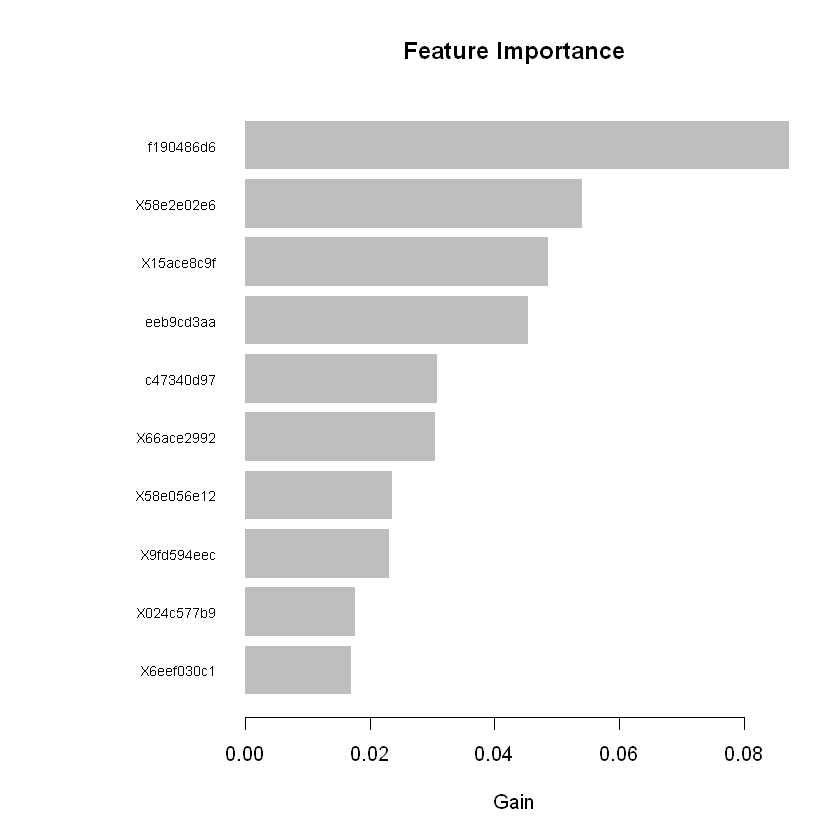

In [16]:
tree_imp <- lgb.importance(lgb.model, percentage = TRUE) %>% head(20)
lgb.plot.importance(tree_imp, measure = "Gain")